In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
column_trans = make_column_transformer(
                (OneHotEncoder(),['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']),
                (StandardScaler(),['age', 'trestbps', 'chol', 'thalach', 'oldpeak']),
                remainder = 'passthrough')

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [8]:
column_trans.fit_transform(X_train)

array([[ 1.        ,  0.        ,  1.        , ...,  0.82851175,
        -2.00163972,  0.66036428],
       [ 1.        ,  0.        ,  0.        , ...,  0.07503002,
         0.97945954, -0.91869649],
       [ 0.        ,  1.        ,  1.        , ...,  1.3308329 ,
        -1.8661352 ,  1.07590658],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.9834324 ,
         0.52777784,  0.66036428],
       [ 0.        ,  1.        ,  0.        , ...,  0.16473023,
         0.25676881, -0.91869649],
       [ 0.        ,  1.        ,  0.        , ...,  0.64911134,
         0.43744149,  0.57725581]])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
logreg = LogisticRegression(solver='lbfgs')
pipe = make_pipeline(column_trans,logreg)

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.8621951219512194

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,31):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    pipe = make_pipeline(column_trans,knn_classifier)
    knn_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

In [22]:
knn_scores[25]

0.8621951219512196

In [24]:
from sklearn.svm import SVC
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    pipe = make_pipeline(column_trans,svc_classifier)
    svc_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

In [26]:
svc_scores[0] #linear

0.8669512195121951

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    pipe = make_pipeline(column_trans,dt_classifier)
    dt_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

In [29]:
dt_scores[4]

0.8030487804878049

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    pipe = make_pipeline(column_trans,rf_classifier)
    rf_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

In [31]:
rf_scores[1]

0.8425609756097561

In [32]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
pipe = make_pipeline(column_trans,nb)
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.8082926829268293

In [33]:
pipe = make_pipeline(column_trans,logreg)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak'])])),
                ('logisticregression', LogisticRegression())])

In [36]:
y_pred = pipe.predict(X_test)

In [37]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)*100

84.0

In [38]:
svc_classifier = SVC(kernel = 'linear')
pipe = make_pipeline(column_trans,svc_classifier)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak'])])),
                ('svc', SVC(kernel='linear'))])

In [39]:
y_pred = pipe.predict(X_test)

In [55]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)*100

83.0

In [53]:
print("Hello world")

Hello world


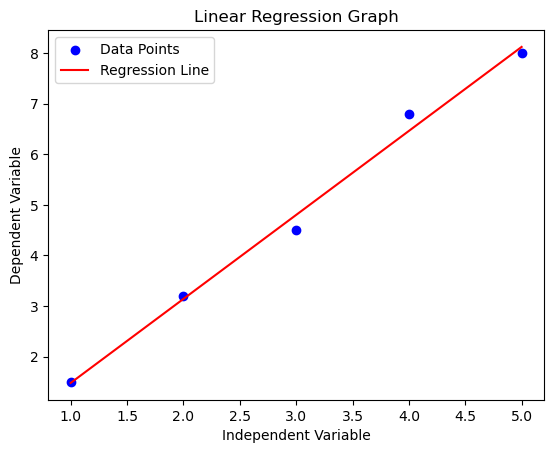

In [57]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  
y = np.array([1.5, 3.2, 4.5, 6.8, 8.0])       

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predictions for plotting
y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Data Points')  
plt.plot(X, y_pred, color='red', label='Regression Line')  
plt.title('Linear Regression Graph')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.legend()
plt.show()
